Modelo SIR
Se pueden probar diferentes valores para las variables pero puede ser (si los datos no son más o menos realistas) que la gráfica salga distorsionada.
El programa  nos dirá la evolución de la epidemia en 1 año (360 días)
Population N?4900000
Initial number of infected?1
Initial number of recovered?0
Contact Rate in 1/day0.00000003145
Mean recovery rate in 1/day0.00216
Natality Rate in 1/day0.008
Proportion of vaxed population?0.9


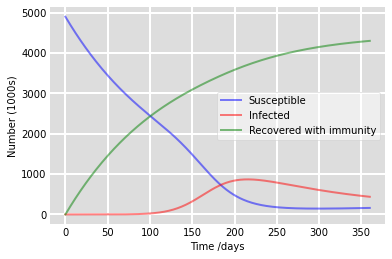

Un infectado podrá contagiar a 1.5167814960629917 personas


In [3]:
print("Modelo SIR")
print("Se pueden probar diferentes valores para las variables pero puede ser (si los datos no son más o menos realistas) que la gráfica salga distorsionada.")
print("El programa  nos dirá la evolución de la epidemia en 1 año (360 días)")



import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import OdeSolver


# Total population, N.
N = int(input("Population N?"))
# Initial number of infected and recovered individuals, I0 and R0.
I0 = int(input("Initial number of infected?"))
R0 = int(input("Initial number of recovered?"))
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma.
beta = float(input("Contact Rate in 1/day"))
gamma = float(input("Mean recovery rate in 1/day"))
#Natality Rate
mu = float(input("Natality Rate in 1/day"))
#Percentage of vaxed population
P = float(input("Proportion of vaxed population?"))
 #Clave del desenlace:
R1 = (beta*N)/(gamma+mu)
#Clave del desenlace con vacunación:
R2 = R1*(1-P)
# A grid of time points (in days)
t = np.linspace(0,360,360)
if(P == 0):
    # The SIR model differential equations.
    def deriv(y, t, N, beta, gamma, mu):
        S, I, R = y
        dSdt = mu*N -beta * S * I - mu * S
        dIdt = beta * S * I - mu*I - gamma * I
        dRdt = gamma * I -mu*R
        return dSdt, dIdt, dRdt

    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
    

else:
      # The SIR model differential equations.
    def deriv(y, t, N, beta, gamma, mu, P):
        S, I, R = y
        dSdt = (mu*N*(1-P)) -(beta * S * I) - (mu * S)
        dIdt = (beta * S * I) - (mu*I) - (gamma * I)
        dRdt = (gamma * I) -(mu*R) + (P*mu*N)
        return dSdt, dIdt, dRdt

    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu, P))
    S, I, R = ret.T
   

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

    plt.show()
if (P == 0):
    print("Un infectado podrá contagiar a",R1,"personas")
else:
     print("Un infectado podrá contagiar a",R2,"personas")

  
   

